In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#%%capture
!unzip drive/My\ Drive/Colab\ Notebooks/cnn_stories_tokenized.zip

Archive:  drive/My Drive/Colab Notebooks/cnn_stories_tokenized.zip
replace cnn_stories_tokenized/daf94a7a113ecd9303f4ab32cea2217d03fe35bb.story? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
  inflating: cnn_stories_tokenized/f707f78d5aa8d69b334f1157c31fb895531a2d25.story  
  inflating: cnn_stories_tokenized/ce8a0911aef45efacb98d86de3f40e29b0637741.story  
  inflating: cnn_stories_tokenized/73f943a932bd1282f760f49ca7aba4e3ffafae17.story  
  inflating: cnn_stories_tokenized/86eaa90c419d5ed93341248fecd8c25d820f2b82.story  
  inflating: cnn_stories_tokenized/cfe85217999162d6af1ddc7b0e6fbc14f1876cb1.story  
  inflating: cnn_stories_tokenized/777448a2b7495a7e5b23409e70a8d3c444613b9c.story  
  inflating: cnn_stories_tokenized/f23153e36f563c3be89a58861dd6f9ee7eac3fe5.story  
  inflating: cnn_stories_tokenized/4de4e9cbe254b69ca8b6677b97bdc0e416d060e6.story  
  inflating: cnn_stories_tokenized/5c4715f11fe4eb721b5fb3e83025127dad1ca6f9.story  
  inflating: cnn_stories_tokenized/48168f99c8015ffcae5b4323

In [0]:
from os import listdir
import string
import numpy as np

In [0]:
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, encoding='utf-8')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

In [0]:
# load all stories in a directory
def load_stories(directory):
	for name in listdir(directory):
		filename = directory + '/' + name
		# load document
		doc = load_doc(filename)

In [0]:
# split a document into news story and highlights
def split_story(doc):
	# find first highlight
	index = doc.find('@highlight')
	# split into story and highlights
	story, highlights = doc[:index], doc[index:].split('@highlight')
	# strip extra white space around each highlight
	highlights = [h.strip() for h in highlights if len(h) > 0]
	return story, highlights

In [0]:
# load all stories in a directory
def load_stories(directory):
	all_stories = list()
	only_sentences = list()
	for name in listdir(directory):
		filename = directory + '/' + name
		# load document
		doc = load_doc(filename)
		# split into story and highlights
		story, highlights = split_story(doc)
		# store
		all_stories.append({'story':story, 'highlights':highlights})					#uncomment this line to return all_stories
		only_sentences.append(story)
	return only_sentences,all_stories										#also returns all_stories but removed to save ram

In [0]:

directory = '/content/cnn_stories_tokenized'
only_sentences, stories = load_stories(directory)
print('Loaded Stories %d' % len(only_sentences))

Loaded Stories 92579


In [0]:
only_sentences[0]

"Chicago -LRB- CNN -RRB- -- The headline in the Chicago Tribune left no one in any doubt . `` Obama Solid in Illinois . ''\n\nThe latest polls are clear -- President Barack Obama will carry his home city and state and scoop up its 20 electoral college votes in his battle for re-election by a large majority . Illinois will vote Democrat , as it has for the past five elections .\n\nObviously Chicago is amongst the last places to get an unbiased opinion on this year 's presidential race . This is the absolute heart of Obama country . It is the place where Obama lived and taught law . The city where he started his political life , first elected to the state legislature then , in a few short years , honing his policies for national office .\n\nFull coverage : CNN 's Election Center\n\nIllinois is where he announced his run for the presidency . Four years ago , in Chicago 's Grant Park , the new President-elect Obama delivered his victory speech in front of tens of thousands of screaming sup

In [0]:

# clean a list of lines
def clean_lines(lines):
	cleaned = list()
	# prepare a translation table to remove punctuation
	table = str.maketrans('', '', string.punctuation)
	#print(len(lines))
	for line in lines:
		# strip source cnn office if it exists
		index = line.find('(CNN) -- ')
		if index > -1:
			line = line[index+len('(CNN)'):]
		# tokenize on white space
		line = line.split()
		# convert to lower case
		line = [word.lower() for word in line]
		# remove punctuation from each token
		line = [w.translate(table) for w in line]
		# remove tokens with numbers in them
		line = [word for word in line if word.isalpha()]
		# store as string
		cleaned.append(' '.join(line))
	# remove empty strings
	cleaned = [c for c in cleaned if len(c) > 0]
	return cleaned

In [0]:
# clean stories
for example in stories:
	example['story'] = clean_lines(example['story'].split('\n'))
	example['highlights'] = clean_lines(example['highlights'])
 
# clean only_sentences
count=0
cleaned_sentences = []
len_each_doc=[]
progress=10
for example in only_sentences:
	count+=1
	percent = (count/92579)*100
	percent = int(percent)
	if (percent) == progress:
		print(percent)
		progress+=10
	cleaned_sentences.extend(clean_lines(example.split('\n')))
len(cleaned_sentences)
#len(stories[1]['story'])

10
20
30
40
50
60
70
80
90
100


1972519

In [0]:
only_sentences[0:15]

["Chicago -LRB- CNN -RRB- -- The headline in the Chicago Tribune left no one in any doubt . `` Obama Solid in Illinois . ''\n\nThe latest polls are clear -- President Barack Obama will carry his home city and state and scoop up its 20 electoral college votes in his battle for re-election by a large majority . Illinois will vote Democrat , as it has for the past five elections .\n\nObviously Chicago is amongst the last places to get an unbiased opinion on this year 's presidential race . This is the absolute heart of Obama country . It is the place where Obama lived and taught law . The city where he started his political life , first elected to the state legislature then , in a few short years , honing his policies for national office .\n\nFull coverage : CNN 's Election Center\n\nIllinois is where he announced his run for the presidency . Four years ago , in Chicago 's Grant Park , the new President-elect Obama delivered his victory speech in front of tens of thousands of screaming su

In [0]:
'''
import tensorflow as tf
import tensorflow_hub as hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/3"
# Import the Universal Sentence Encoder's TF Hub module
embed = hub.Module(module_url)

# Compute a representation for each message, showing various lengths supported.
messages = ["That start is large", "What is the power of that car"]

with tf.Session() as session:
  session.run([tf.global_variables_initializer(), tf.tables_initializer()])
  message_embeddings = session.run(embed(messages))

print (message_embeddings)
'''

'\nimport tensorflow as tf\nimport tensorflow_hub as hub\nmodule_url = "https://tfhub.dev/google/universal-sentence-encoder-large/3"\n# Import the Universal Sentence Encoder\'s TF Hub module\nembed = hub.Module(module_url)\n\n# Compute a representation for each message, showing various lengths supported.\nmessages = ["That start is large", "What is the power of that car"]\n\nwith tf.Session() as session:\n  session.run([tf.global_variables_initializer(), tf.tables_initializer()])\n  message_embeddings = session.run(embed(messages))\n\nprint (message_embeddings)\n'

In [0]:
import os
if 'COLAB_TPU_ADDR' not in os.environ:
  print('ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!')
else:
  tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  print ('TPU address is', tpu_address)

TPU address is grpc://10.68.40.186:8470


In [0]:
#####  faster implementation  #####


import tensorflow as tf
import tensorflow_hub as hub

# Create graph and finalize (finalizing optional but recommended).
g = tf.Graph()
with g.as_default():
  # We will be feeding 1D tensors of text into the graph.
  text_input = tf.placeholder(dtype=tf.string, shape=[None])
  embed = hub.Module("https://tfhub.dev/google/universal-sentence-encoder/2")
  embedded_text = embed(text_input)
  init_op = tf.group([tf.global_variables_initializer(), tf.tables_initializer()])
g.finalize()

# Create session and initialize.
session = tf.Session(graph=g)
session.run(init_op)

result = session.run(embedded_text, feed_dict={text_input: cleaned_sentences[0:8]})   
  

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [0]:
result

array([[ 0.05548698,  0.05102821, -0.05074489, ...,  0.04129152,
        -0.0316469 , -0.00140396],
       [ 0.00376451, -0.01467005, -0.05354414, ...,  0.01785652,
        -0.04500919,  0.00577886],
       [ 0.02904557,  0.02673068, -0.04096976, ..., -0.02030348,
        -0.0225195 , -0.06267504],
       ...,
       [ 0.01863275,  0.02126431, -0.01135807, ...,  0.01409292,
        -0.04074418, -0.04887664],
       [-0.02789052, -0.00186937, -0.01862282, ...,  0.01896437,
        -0.03547566, -0.02638973],
       [-0.04369596, -0.04768831, -0.03869301, ...,  0.00611186,
        -0.04418923, -0.06725734]], dtype=float32)

In [0]:
result

array([[ 0.05548698,  0.05102821, -0.05074489, ...,  0.04129152,
        -0.0316469 , -0.00140396],
       [ 0.00376451, -0.01467005, -0.05354414, ...,  0.01785652,
        -0.04500919,  0.00577886],
       [ 0.02904557,  0.02673068, -0.04096976, ..., -0.02030348,
        -0.0225195 , -0.06267504],
       ...,
       [ 0.01863275,  0.02126431, -0.01135807, ...,  0.01409292,
        -0.04074418, -0.04887664],
       [-0.02789052, -0.00186937, -0.01862282, ...,  0.01896437,
        -0.03547566, -0.02638973],
       [-0.04369596, -0.04768831, -0.03869301, ...,  0.00611186,
        -0.04418923, -0.06725734]], dtype=float32)

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
cos=cosine_similarity(result)
cos 

array([[1.0000002 , 0.6146909 , 0.58017766, 0.654245  , 0.66670513,
        0.5580973 , 0.11090735, 0.18778983],
       [0.6146909 , 0.9999999 , 0.6199144 , 0.5419156 , 0.7270191 ,
        0.6624779 , 0.18111584, 0.19445828],
       [0.58017766, 0.6199144 , 1.        , 0.47280723, 0.6740806 ,
        0.6358625 , 0.30868983, 0.19349869],
       [0.654245  , 0.5419156 , 0.47280723, 1.0000002 , 0.5630057 ,
        0.51040274, 0.1597831 , 0.30062357],
       [0.66670513, 0.7270191 , 0.6740806 , 0.5630057 , 0.99999994,
        0.6243037 , 0.18001483, 0.2875393 ],
       [0.5580973 , 0.6624779 , 0.6358625 , 0.51040274, 0.6243037 ,
        0.9999999 , 0.21653587, 0.22017276],
       [0.11090735, 0.18111584, 0.30868983, 0.1597831 , 0.18001483,
        0.21653587, 1.0000002 , 0.54403305],
       [0.18778983, 0.19445828, 0.19349869, 0.30062357, 0.2875393 ,
        0.22017276, 0.54403305, 1.        ]], dtype=float32)

In [0]:
#adjacency matrix
size=result.shape[0]
adj_matrix=np.zeros((size,size))
ii=0
jj=0
for i in range(size):
  for j in range(size):
    if cos[i][j]>0.75:   
      adj_matrix[i][j] = 1
    else:
      adj_matrix[i][j] = 0
adj_matrix


In [0]:
np.matmul(adj_matrix,result)

array([[ 0.05548698,  0.05102821, -0.05074489, ...,  0.04129152,
        -0.0316469 , -0.00140396],
       [ 0.00376451, -0.01467005, -0.05354414, ...,  0.01785652,
        -0.04500919,  0.00577886],
       [ 0.02904557,  0.02673068, -0.04096976, ..., -0.02030348,
        -0.0225195 , -0.06267504],
       ...,
       [ 0.01863275,  0.02126431, -0.01135807, ...,  0.01409292,
        -0.04074418, -0.04887664],
       [-0.02789052, -0.00186937, -0.01862282, ...,  0.01896437,
        -0.03547566, -0.02638973],
       [-0.04369596, -0.04768831, -0.03869301, ...,  0.00611186,
        -0.04418923, -0.06725734]])

In [0]:
D = np.array(np.sum(adj_matrix, axis=0))
D = np.matrix(np.diag(D))


#Di = np.linalg.inv(D)


In [0]:
seed=22321
np.random.seed(seed)
W_1 = tf.Variable(tf.random_normal([512, size], name='W_1'))
W_2 = tf.Variable(tf.random_normal([W_1.shape[1], size], name='W_2')) 
# W_2 = np.random.normal(
#     loc=0, size=(W_1.shape[1], size))

W_1=tf.cast(W_1, tf.float64)
W_2=tf.cast(W_2, tf.float64)

def gcn_layer(A_hat, D_hat, X, W):
  Di = np.linalg.inv(D_hat)
  print(Di.shape)
  print(A_hat.shape)
  print(X.shape)
  print(W.shape)
  X=tf.cast(X, tf.float64)
  A_hat=tf.cast(A_hat, tf.float64)
  # W=tf.cast(W, tf.float64)
  aaa=tf.linalg.matmul(Di,A_hat)
  bbb=tf.linalg.matmul(X,W)
  ccc=tf.linalg.matmul(aaa,bbb)
  #above 3 calcs are equal to Di * A_hat * X * W
  return tf.nn.relu(ccc)
    
#adj_matrix, D, message_embeddings, W

H_1 = gcn_layer(adj_matrix, D, result, W_1)
H_2 = gcn_layer(adj_matrix, D, H_1, W_2)

output = H_2

result=tf.cast(result, tf.float64)
Di = np.linalg.inv(D)
inp=tf.linalg.matmul(tf.linalg.matmul(Di,adj_matrix), tf.linalg.matmul(result,W_1) )
#inp=Di * adj_matrix * result * W_1
inp=tf.convert_to_tensor(inp) 
# with tf.Session() as sess: 
#     print('Input type:', inp) 
#     print('Input:', sess.run(inp)) 
#     print('Return type:', H_2) 
#     print('Output:', sess.run(H_2)) 
# print(H_2==0)


(8, 8)
(8, 8)
(8, 512)
(512, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)


In [0]:
#salience estimation
np.random.seed(seed)
salienceW = tf.Variable(tf.random_normal([size, size], name='salienceW'))
#salienceW = np.random.normal(loc=0, scale=1, size=(size,size))
salienceW=tf.cast(salienceW, tf.float64)
tanned=tf.nn.sigmoid(tf.linalg.matmul(H_2 , salienceW))
# with tf.Session() as sess:
#   out_tan=sess.run(tanned)

#print("tan=",out_tan.shape)

v = tf.Variable(tf.random_normal([size,1], name='v'))
#v = np.random.normal(loc=0, scale=1, size=(size,1))

v=tf.cast(v, tf.float64)

fs=tf.linalg.matmul(tanned, v)
# with tf.Session() as sess:
#   fs=sess.run(tf.linalg.matmul(tanned, v))
# fs.shape

sum_salience=tf.reduce_sum(fs, 0)
# with tf.Session() as sess:
#   sum_salience=sess.run(tf.reduce_sum(fs, 0))
  #salience=sess.run(fs/sum_salience)

salience=fs/sum_salience
# #print (fs)
# print (salience)
# idx=salience.argmax()
# print(idx)
# print(cleaned_sentences[idx])
# stories[0]['highlights']

In [0]:
salience

<tf.Tensor 'truediv_6:0' shape=(8, 1) dtype=float64>

In [0]:
# calculation of rouge

a=stories[0]['highlights']
overlap=[]
for i in range(len(cleaned_sentences[0:8])):
  overlap.append(0)
  for j in cleaned_sentences[i].split():
    result=a[0].find(j)
    if result!=-1:
     overlap[i]+=1
     #print(j)
rouge1=[]
for d in overlap:
  t=d/len(a[0])
  rouge1.append(t)
rouge1[0:8]

smR1=tf.nn.softmax(rouge1)
fin_smR1=smR1
# with tf.Session() as sess: 
#   fin_smR1=sess.run(smR1)
fin_smR1


<tf.Tensor 'Softmax_5:0' shape=(8,) dtype=float32>

In [0]:
#Calculating cross entropy
fin_smR1=tf.cast(fin_smR1, tf.float64)
fin_smR1 = tf.reshape(fin_smR1,[1,8])




#y_clipped = tf.clip_by_value(y_, 1e-10, 0.9999999)
cross_entropy_ob = -tf.linalg.matmul( fin_smR1, (salience))


In [0]:
#optimmizer

optimiser = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cross_entropy_ob)

In [0]:
init_op = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init_op)

inp_np=inp.eval(session=sess)

fin_smR1_np=fin_smR1.eval(session=sess)

salience_np=salience.eval(session=sess)


dataX = tf.placeholder(tf.float64, [None, 8])
# now declare the output data placeholder - 10 digits
labelY = tf.placeholder(tf.float64, [None, 8])

init_op = tf.global_variables_initializer()
total_batch=8

correct_prediction = tf.equal(tf.argmax(fin_smR1, 1), tf.argmax(salience_np, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# start the session
with tf.Session() as sess:
   # initialise the variables
   sess.run(init_op)
   #total_batch = int(len(mnist.train.labels) / 100)
   for epoch in range(1000):
        avg_cost = 0
        for i in range(total_batch):
            batch_x = inp_np
            batch_y = fin_smR1_np
            _, c = sess.run([optimiser, cross_entropy_ob], feed_dict={dataX: batch_x, labelY: batch_y})
            avg_cost += c / total_batch
        #print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost))
        print("Epoch:", (epoch + 1))
   #print(sess.run(accuracy, feed_dict={x: batch_x, y: batch_y}))

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100
Epoch: 1

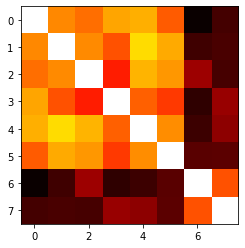

(8, 8)

In [0]:
import matplotlib.pyplot as plt
import numpy as np

a = np.random.random((16, 16))
plt.imshow(cos, cmap='hot', interpolation='nearest')
plt.show()
cos.shape

In [0]:
import networkx as nx
import numpy as np

G = nx.from_numpy_matrix(np.array(adj_matrix)) 
pos = nx.spring_layout(G,k=0.8,iterations=1)
nx.draw(G, with_labels=True,pos=pos)


adj_matrix.sum()